# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

# Exploração dos dados

In [5]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

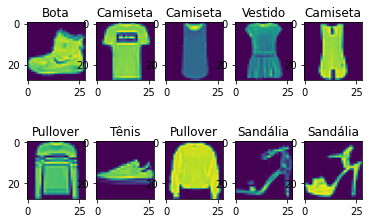

In [6]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido','Casaco','Sandália','Camisa',
                           'Tênis','Bolsa','Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

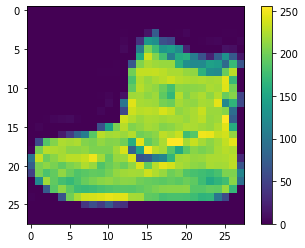

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [8]:
imagens_treino = imagens_treino/float(255)

# Construindo o modelo

Criando, compilando, treinando e normalizando o modelo

In [9]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6641 - accuracy: 0.7683 - val_loss: 0.4199 - val_accuracy: 0.8493
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4028 - accuracy: 0.8527 - val_loss: 0.3714 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8662 - val_loss: 0.3685 - val_accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3392 - accuracy: 0.8741 - val_loss: 0.3668 - val_accuracy: 0.8658
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3243 - accuracy: 0.8798 - val_loss: 0.3547 - val_accuracy: 0.8714


# Salvando e carregando o modelo

In [17]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Plotando o gráfico de acurácia de treino e validação por época

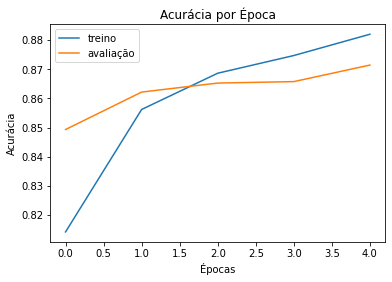

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por Época")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','avaliação'])

# Plotando a perda de treino e validação por época



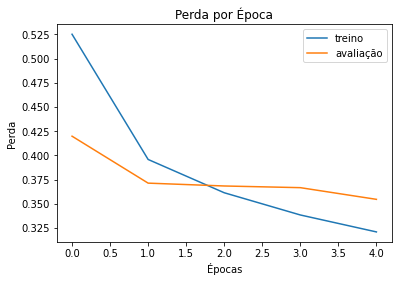

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por Época")
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','avaliação'])

# Teste do modelo

testando o modelo treinado e o modelo salvo

In [22]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[15]))
print('número da imagem de teste:', identificacoes_teste[15])

resultado teste: 1
número da imagem de teste: 1


resultado teste modelo salvo:  2
número da imagem de teste: 2


In [13]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 64.6066 - accuracy: 0.8476
Perda do teste:  64.60662078857422
Acurácia do teste:  0.847599983215332
